# Seaborn practice

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
crash = sns.load_dataset('car_crashes')
crash.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


## Distribution Plots

### Distribution Plot 
[documentation](https://seaborn.pydata.org/tutorial/distributions.html)  
kde--> kernel density estimation

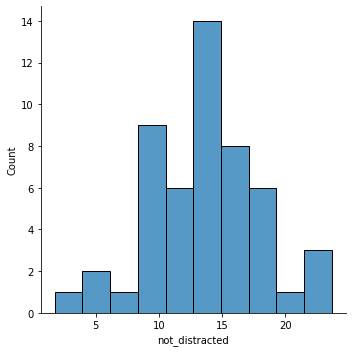

In [4]:
sns.displot(crash['not_distracted'],bins=10)

### Joint Plot

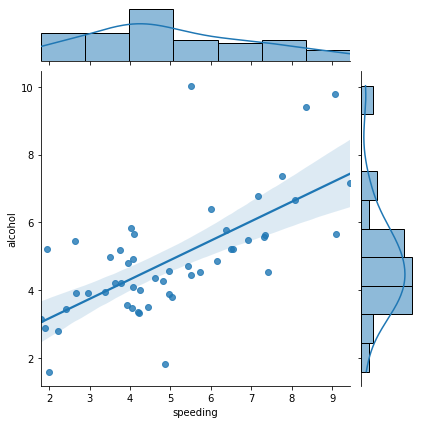

In [5]:
sns.jointplot(x='speeding' , y='alcohol', data = crash , kind = 'reg')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

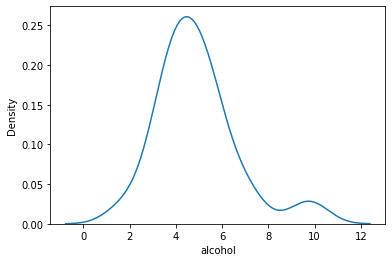

In [6]:
sns.kdeplot(crash['alcohol'])

### Pair Plot

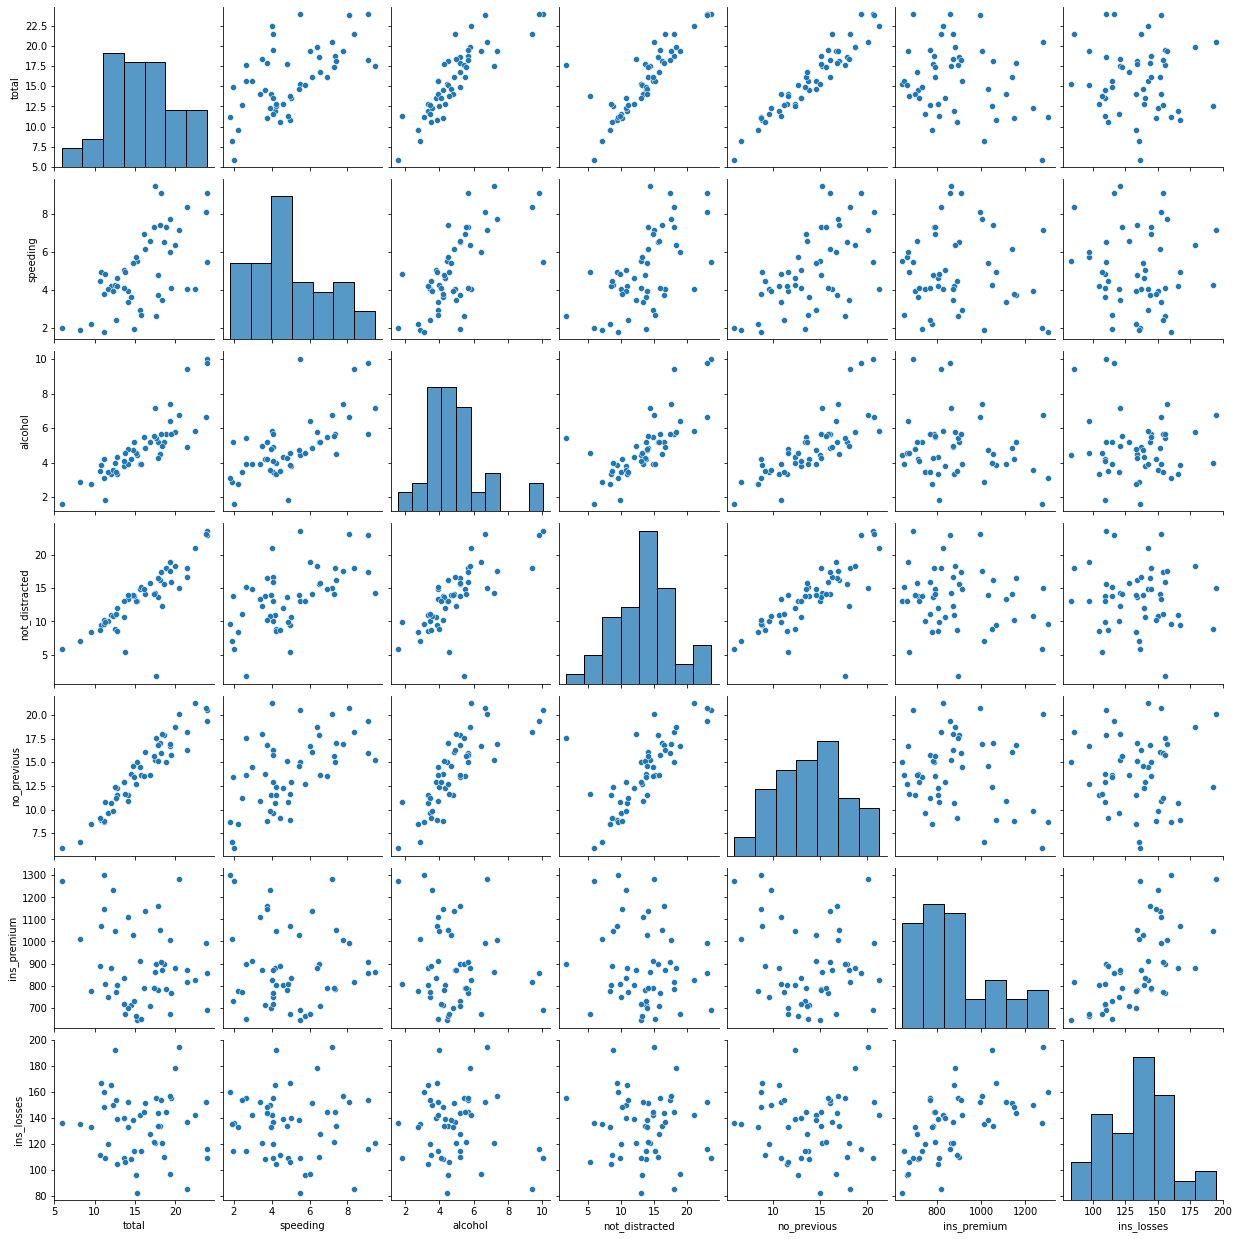

In [7]:
sns.pairplot(crash)

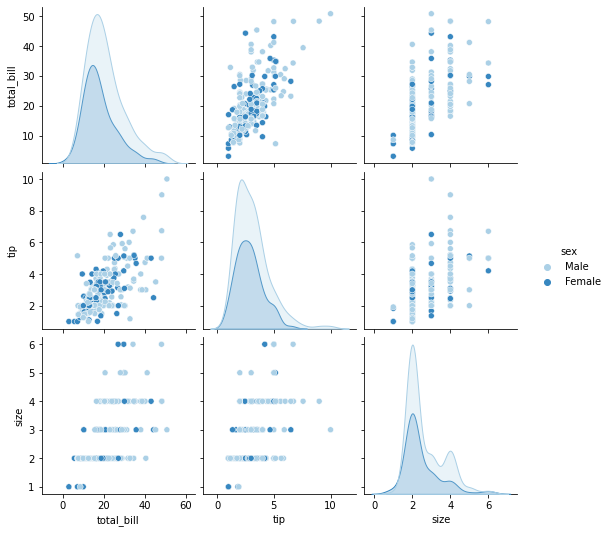

In [8]:
tips = sns.load_dataset('tips')
sns.pairplot(tips,hue='sex',palette='Blues')

### Rug Plot

<AxesSubplot:xlabel='tip'>

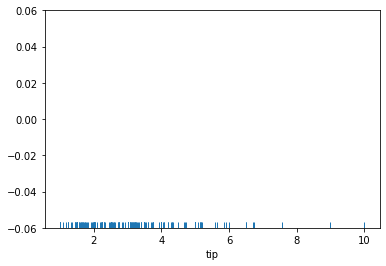

In [9]:
sns.rugplot(tips['tip'])

### Styling

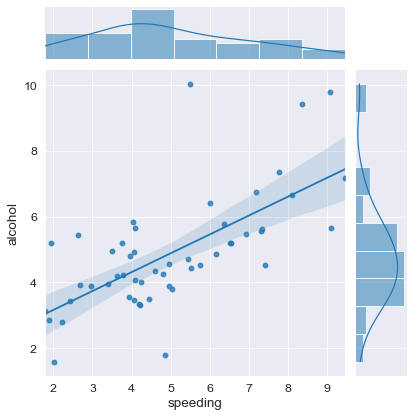

In [10]:
# dark , white , whitegrid , darkgrid ,ticks
sns.set_style('darkgrid')

# paper(notebook) , talk(presentation) , poster(poster)
sns.set_context('paper',font_scale=1.4)

sns.jointplot(x='speeding' , y='alcohol', data = crash , kind = 'reg')



## Categorical Plots  
[documentation](https://seaborn.pydata.org/tutorial/categorical.html)

### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

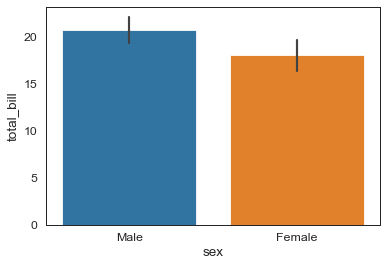

In [11]:
sns.set_style('white')
sns.barplot(x='sex',y='total_bill', data=tips)

### Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

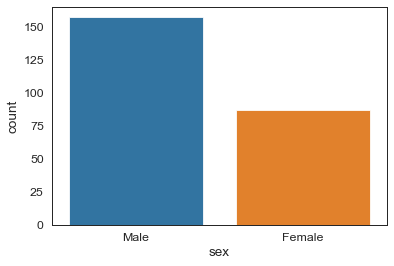

In [12]:
sns.countplot(x='sex', data=tips)

### Box Plot

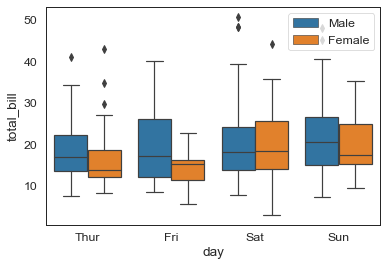

In [13]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex')
plt.legend(loc=1)

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

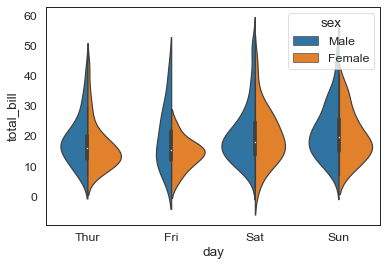

In [14]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

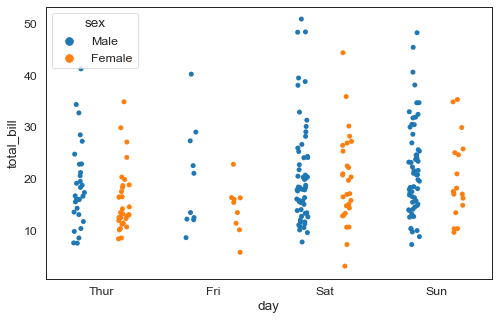

In [15]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day',y='total_bill',data=tips, jitter=True,hue='sex',dodge=True)

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

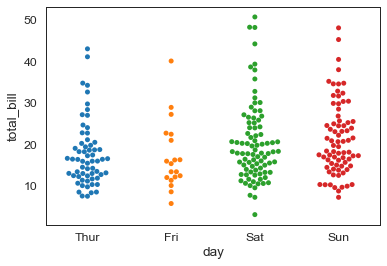

In [16]:
# sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips)

### Color Palettes
[colormaps doc](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

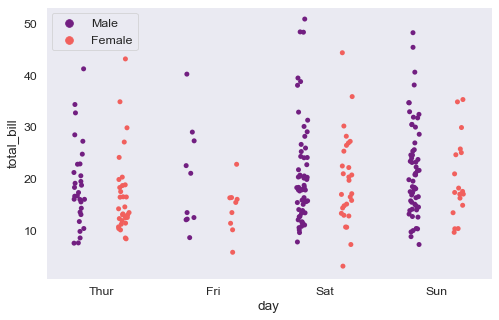

In [17]:
plt.figure(figsize=(8,5))

sns.set_style('dark')


sns.stripplot(x='day',y='total_bill'
              ,data=tips,jitter=True
              ,hue='sex',dodge=True
              ,palette='magma')

plt.legend(loc=0) # prevent legent fro overlapping content

## Matrix Plot

### Heatmaps

<AxesSubplot:>

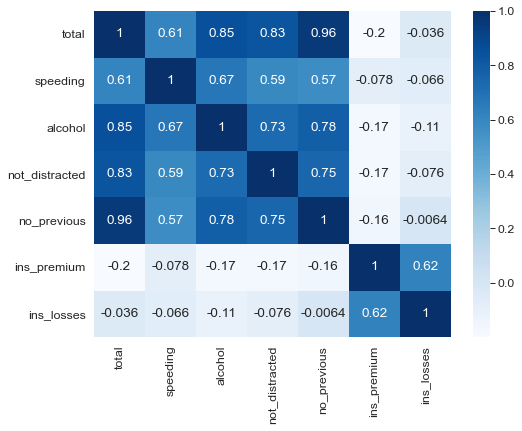

In [18]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

crash_mx = crash.corr()

sns.heatmap(crash_mx,annot=True,cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='month'>

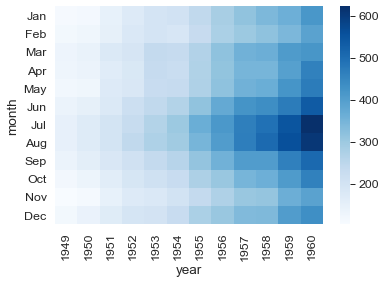

In [22]:
flights = sns.load_dataset('flights')
flights_mx = flights.pivot_table(index='month',columns='year',values='passengers')
sns.heatmap(flights_mx,cmap='Blues')

### Cluster Map

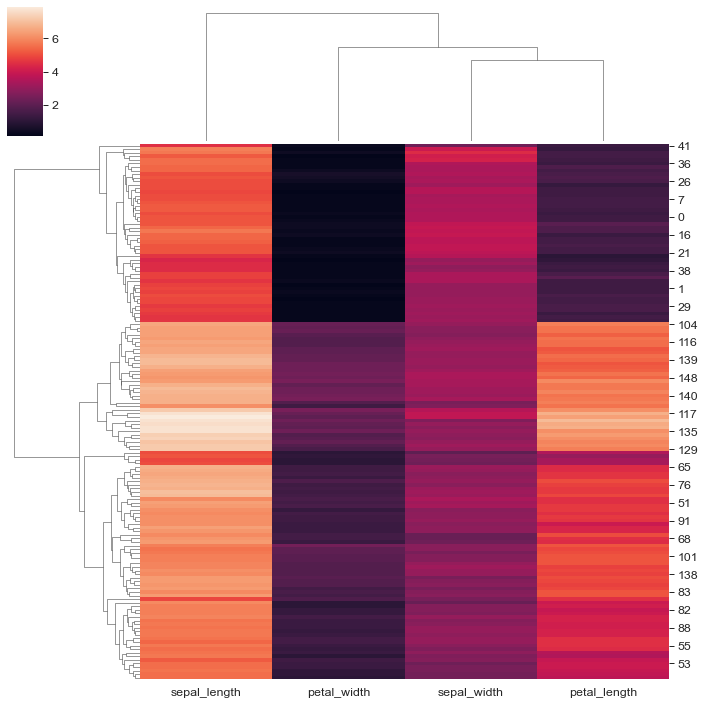

In [24]:
iris = sns.load_dataset('iris')

species = iris.pop('species')
sns.clustermap(iris)

###  Pair Grids

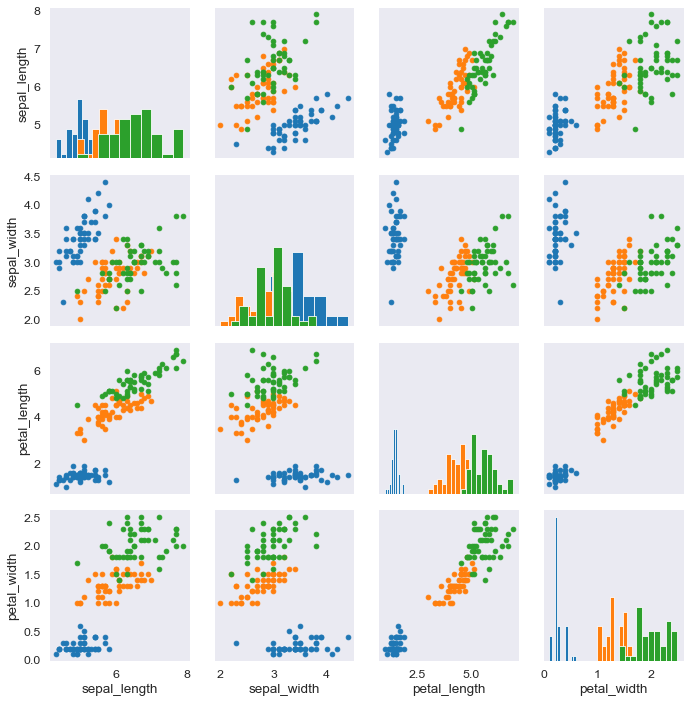

In [34]:
sns.set_style('dark')

iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris , hue='species')
# iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

 ### Facet Grid

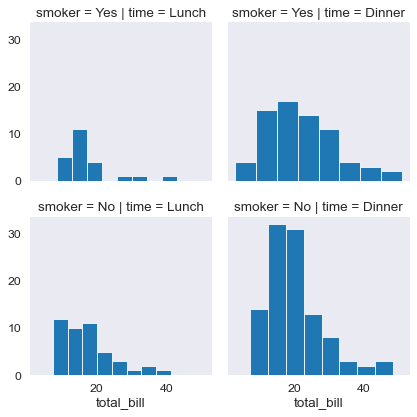

In [36]:
tips_fg = sns.FacetGrid(tips,col='time',row='smoker')
tips_fg.map(plt.hist,'total_bill',bins=8)

## Regression Plots

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

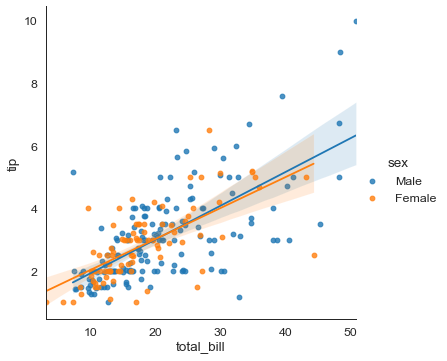

In [46]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips)

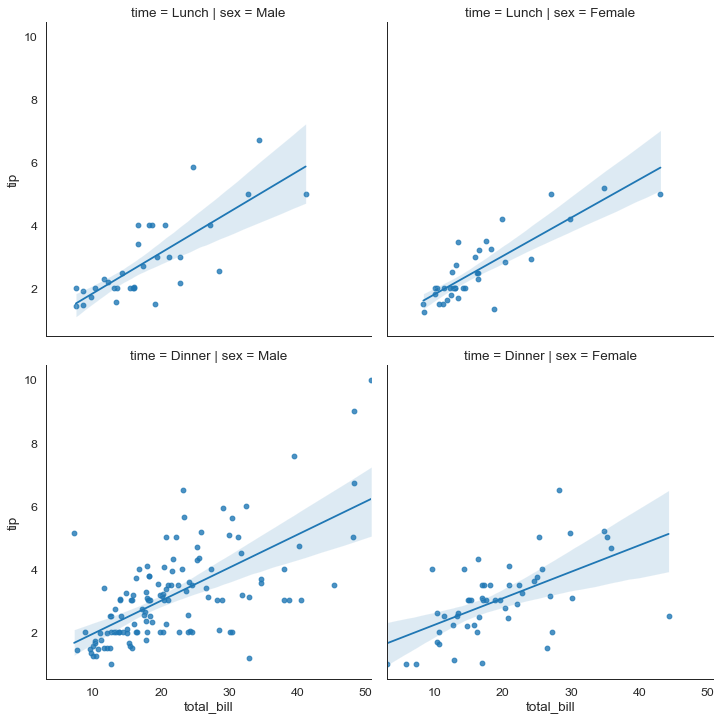

In [47]:
sns.lmplot(x='total_bill',y='tip',col='sex',row='time',data=tips)